# Problem description

**Context**

The original dataset contains 1000 records with 20 categorical attributes prepared by Prof. Hofmann.

In this dataset, each record represents a person taking out a loan from a bank.

Each person is classified as **good** or **bad** credit risk based on the set of attributes.

Link to the original dataset at

[UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))


**Content**

The selected attributes:


* **Age** (numeric)
* **Sex** (text: male, female)
* **Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* **Housing** (text: own, rent, or free)
* **Saving accounts** (text - little, moderate, quite rich, rich)
* **Checking account** (numeric, in DM - Deutsch Mark)
* **Credit amount** (numeric, in DM)
* **Duration** (numeric, in month)
* **Purpose**(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
* **Risk** (Value target - Good or Bad Risk)

**Objective**

Train a model to predict from new data whether a person applying for a loan represents a good or bad risk

# Load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
dataset = pd.read_csv('german_credit_data.csv')
dataset.head(5)

,Unnamed: 0,age,sex,job,housing,saving_accounts,checking account,credit amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Structure verification

In [13]:
# Dimension

dataset.shape

(1000, 11)

In [4]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   age               1000 non-null   int64 
 2   sex               1000 non-null   object
 3   job               1000 non-null   int64 
 4   housing           1000 non-null   object
 5   saving_accounts   817 non-null    object
 6   checking account  606 non-null    object
 7   credit amount     1000 non-null   int64 
 8   duration          1000 non-null   int64 
 9   purpose           1000 non-null   object
 10  risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
# show

dataset.head(5)

,Unnamed: 0,age,sex,job,housing,saving_accounts,checking account,credit amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
# statistical description

dataset.describe()

,Unnamed: 0,age,job,credit amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
# unique values

dataset.nunique()

,0
Unnamed: 0,1000
age,53
sex,2
job,4
housing,3
saving_accounts,4
checking account,3
credit amount,921
duration,33
purpose,8


<Axes: >

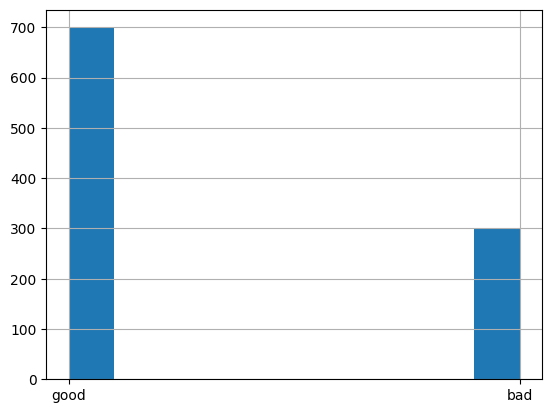

In [8]:
# histogram

dataset.risk.hist()

<Axes: >

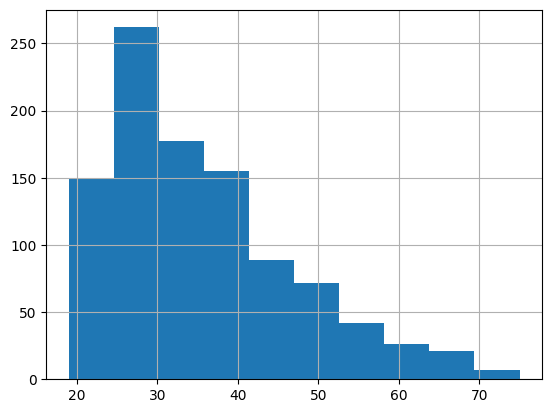

In [9]:
#age histogram
dataset.age.hist()

In [16]:
#correlation matrix
corrmat = dataset.corr(numeric_only=True)
corrmat

,Unnamed: 0,age,job,credit amount,duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
age,-0.010096,1.000000,0.015673,0.032716,-0.036136
job,-0.027345,0.015673,1.000000,0.285385,0.210910
credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
duration,0.030788,-0.036136,0.210910,0.624984,1.000000


<Axes: >

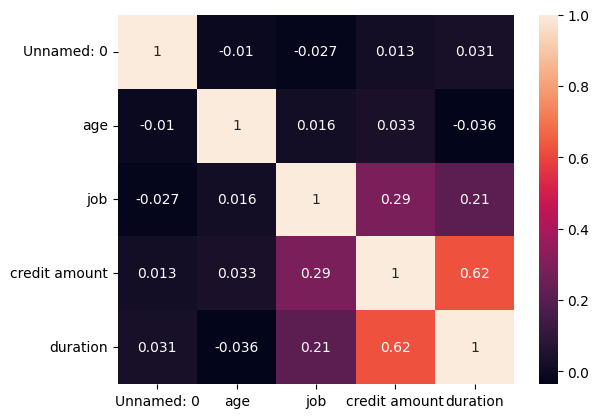

In [17]:
import seaborn as sns
sns.heatmap(corrmat, annot=True)

# Notes